In [1]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evapa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evapa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# read the data
data = pd.read_csv('responses_AB_paired_final_processed.csv')

In [3]:
# prepare the data
text = ' '.join(data['lime_pros_cons'].dropna())
stop_words = set(stopwords.words('english'))

In [4]:
# find the sentiment
analyzer = SentimentIntensityAnalyzer()

In [5]:
def sentiment_color(word, **kwargs):
    if pd.isna(text) or text.strip() == "":
        return None
    sentiment = analyzer.polarity_scores(word)['compound']
    if sentiment > 0:
        return 'green'  # Positive words
    elif sentiment < 0:
        return 'red'    # Negative words
    else:
        return 'gray'   # Neutral words

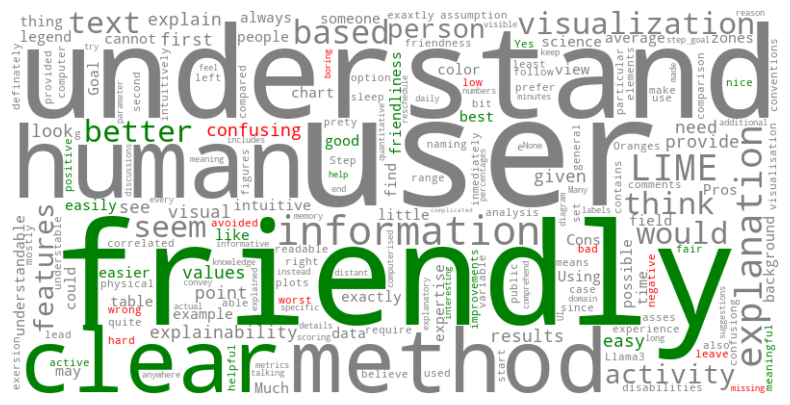

In [6]:
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=sentiment_color), interpolation='bilinear')
plt.axis('off')
plt.show()